# Libraries and Dependencies

In [2]:
!pip install pandas
!pip install numpy
!pip install transformers
!pip install torch torchvision

# install the sentencepiece library
# NOTE: if installing for the first time and if using google colab, restart the runtime after installation
!pip install sentencepiece

     |████████████████████████████████| 1.9MB 11.3MB/s 
     |████████████████████████████████| 890kB 36.9MB/s 
     |████████████████████████████████| 3.2MB 35.2MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp37-none-any.whl size=893262 sha256=f18253a97f06ee3da1706d3d55611cb4a015eecb82b3b5eaaad015a585c7347b
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses
     |████████████████████████████████| 1.2MB 10.4MB/s 


# Imports

In [19]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import datetime as dt
import random
import torch
import seaborn as sns
import matplotlib.pyplot as plt
from torch.utils.data import RandomSampler, SequentialSampler, TensorDataset, DataLoader
from transformers import RobertaForSequenceClassification, RobertaTokenizer, BertForSequenceClassification, BertTokenizer,AdamW
from transformers import DebertaForSequenceClassification, AlbertForSequenceClassification, ElectraForSequenceClassification
from transformers import DebertaTokenizer, AlbertTokenizer, ElectraTokenizer
from sklearn.metrics import f1_score, classification_report

# Pre-trained Models

In [4]:
# Use GPU if available else use CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device: ", device)

# import the pre-trained models
modelB = BertForSequenceClassification.from_pretrained("bert-base-uncased").to(device)
modelR = RobertaForSequenceClassification.from_pretrained("roberta-base").to(device)
modelE = ElectraForSequenceClassification.from_pretrained("google/electra-base-discriminator").to(device)
modelA = AlbertForSequenceClassification.from_pretrained("albert-base-v2").to(device)
modelD = DebertaForSequenceClassification.from_pretrained("microsoft/deberta-base").to(device)

# Tokenizers to be used
tokenizerB = BertTokenizer.from_pretrained("bert-base-uncased")
tokenizerR = RobertaTokenizer.from_pretrained("roberta-base")
tokenizerE = ElectraTokenizer.from_pretrained("google/electra-base-discriminator")
tokenizerA = AlbertTokenizer.from_pretrained("albert-base-v2")
tokenizerD = DebertaTokenizer.from_pretrained("microsoft/deberta-base")

print("Model ready to be fine-tuned!!!")

Device:  cuda


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.bias', 'lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight', 'roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.weight', 'classifie

Some weights of the model checkpoint at google/electra-base-discriminator were not used when initializing ElectraForSequenceClassification: ['discriminator_predictions.dense.weight', 'discriminator_predictions.dense.bias', 'discriminator_predictions.dense_prediction.weight', 'discriminator_predictions.dense_prediction.bias']
- This IS expected if you are initializing ElectraForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ElectraForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at google/electra-base-discriminator and are newly initialized: ['classifier.d

Some weights of the model checkpoint at albert-base-v2 were not used when initializing AlbertForSequenceClassification: ['predictions.bias', 'predictions.LayerNorm.weight', 'predictions.LayerNorm.bias', 'predictions.dense.weight', 'predictions.dense.bias', 'predictions.decoder.weight', 'predictions.decoder.bias']
- This IS expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of AlbertForSequenceClassification were not initialized from the model checkpoint at albert-base-v2 and are newly initialized: ['classifier.weight', 'classifier.bias']
You sho

Some weights of the model checkpoint at microsoft/deberta-base were not used when initializing DebertaForSequenceClassification: ['lm_predictions.lm_head.bias', 'lm_predictions.lm_head.dense.weight', 'lm_predictions.lm_head.dense.bias', 'lm_predictions.lm_head.LayerNorm.weight', 'lm_predictions.lm_head.LayerNorm.bias', 'config', 'deberta.embeddings.position_embeddings.weight']
- This IS expected if you are initializing DebertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DebertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DebertaForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-base


Model ready to be fine-tuned!!!


# Data Loading

In [6]:
# Load the data
trainData = pd.read_json("./train.jsonl", lines=True, orient="records")
valData = pd.read_json("./val.jsonl", lines=True, orient="records")
testData = pd.read_json("./test.jsonl", lines=True, orient="records")

# Train 
trainPassages = trainData.passage.values
trainQuestions = trainData.question.values
trainAnswers = trainData.label.values.astype(int)

# Validation
valPassages = valData.passage.values
valQuestions = valData.question.values
valAnswers = valData.label.values.astype(int)

# Test
testPassages = testData.passage.values
testQuestions = testData.question.values


# Tokenization

In [7]:
def tokenizeData(tokenizer, questions, passages, max_length=256):
    """Encode the question/passage pairs into features than can be fed to the model."""
    input_ids = []
    attention_masks = []

    for question, passage in zip(questions, passages):
      tokenizedData = tokenizer.encode_plus(question, passage, max_length=max_length, padding='max_length', truncation="longest_first")
      tokenizedQP = tokenizedData["input_ids"]
      attentionMask = tokenizedData["attention_mask"]

      input_ids.append(tokenizedQP)
      attention_masks.append(attentionMask)

    return np.array(input_ids), np.array(attention_masks)


# Building Dataloaders

In [8]:
# Building the Dataloaders

def buildDataLoaders(batchSize, trainFeatures, valFeatures, testFeatures):
  trainTensors = [torch.tensor(feature, dtype=torch.long) for feature in trainFeatures]
  valTensors = [torch.tensor(feature, dtype=torch.long) for feature in valFeatures]

  trainDataset = TensorDataset(*trainTensors)
  valDataset = TensorDataset(*valTensors)

  trainSampler = RandomSampler(trainDataset)
  valSampler = SequentialSampler(valDataset)

  trainDataloader = DataLoader(trainDataset, sampler=trainSampler, batch_size=batchSize)
  valDataloader = DataLoader(valDataset, sampler=valSampler, batch_size=batchSize)

  return trainDataloader, valDataloader

# Fine-Tuning

In [22]:
# Fine-tune the model on downstream task: BoolQ
def train(numEpochs, gradSteps, model, optimizer, trainDataLoader):
    
  trainLossHistory = []

  for _ in tqdm(range(numEpochs), desc="Training Epoch's"):

    # Train the model for fine-tuning
    epochTrainLoss = 0 # Cumulative loss
    model.train()
    model.zero_grad()

    for step, batch in enumerate(trainDataLoader):
        input_ids = batch[0].to(device)
        attention_masks = batch[1].to(device)
        labels = batch[2].to(device)     
        outputs = model(input_ids, token_type_ids=None, attention_mask=attention_masks, labels=labels)

        loss = outputs[0]
        loss = loss / gradSteps
        epochTrainLoss += loss.item()
        loss.backward()
        
        if (step + 1) % gradSteps == 0: # Gradient accumulation is over
          torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0) # Clipping gradients
          optimizer.step()
          model.zero_grad()

    epochTrainLoss = epochTrainLoss / len(trainDataLoader)          
    trainLossHistory.append(epochTrainLoss)

  sns.set()
  plt.plot(trainLossHistory, label="Train_Loss")
  plt.xlabel("Epoch")
  plt.ylabel("Loss")
  plt.title("Training Loss")
  plt.legend()
  plt.xticks(np.arange(0, 3))
  plt.show()

# Evaluation

In [21]:
# Evaluation on validation set
def eval(valDataLoader, numEpochs, model):
    valAccuracy = []
    valF1 = []

    for _ in tqdm(range(numEpochs), desc="Validation Epoch's"):
      epochValAcc = 0
      epochValF1 = 0
      model.eval()
      for batch in valDataLoader:
        input_ids = batch[0].to(device)
        attention_masks = batch[1].to(device)
        labels = batch[2]
                    
        with torch.no_grad():        
            outputs = model(input_ids, token_type_ids=None, attention_mask=attention_masks)
                        
        logits = outputs[0]
        logits = logits.detach().cpu().numpy()
        
        predictions = np.argmax(logits, axis=1).flatten()
        labels = labels.numpy().flatten()
        epochValF1 += f1_score(predictions, labels)
        epochValAcc += np.sum(predictions == labels) / len(labels)

      epochValAcc = epochValAcc / len(valDataLoader)
      epochValF1 = epochValF1 / len(valDataLoader)
      valAccuracy.append(epochValAcc)
      valF1.append(epochValF1)

    acc = sum(valAccuracy) / len(valAccuracy)
    f1 = sum(valF1) / len(valF1)
    print("\nVal Accuracy:", acc)
    print("Val F1:", f1)

    
    plt.plot(valAccuracy, label="Val_Acc")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.title("Evaluation Accuracy")
    plt.legend()
    plt.xticks(np.arange(0, 3))
    plt.show()

    return acc, f1

# Predictions

In [10]:
# Making Predictions on the test set
def predict(question, passage, max_length=512):
  sequence = tokenizer.encode_plus(question, passage, max_length=max_length,
                                   padding='max_length', truncation="longest_first" 
                                   , return_tensors="pt")['input_ids'].to(device)
  
  logits = model(sequence)[0]
  probabilities = torch.softmax(logits, dim=1).detach().cpu().tolist()[0]
  proba_yes = round(probabilities[1], 2)
  proba_no = round(probabilities[0], 2)
  return (f"Question: {question}, Yes: {proba_yes}, No: {proba_no}")

# for i in range(len(testPassages)):
#   testPred.write(f"\n{i}" + ": " + predict(testQuestions[i], testPassages[i]))
  



In [11]:
def runModel(model, tokenizer, optimizer, batchSize, maxSeqLength, gradSteps, numEpochs):

  print("Fine-tuning and evaluating the model...")
  # Tokenize the data
  trainIds, trainAttMasks = tokenizeData(tokenizer, trainQuestions, trainPassages, maxSeqLength)
  valIds, valAttMasks = tokenizeData(tokenizer, valQuestions, valPassages, maxSeqLength)
  testIds, testAttMasks = tokenizeData(tokenizer, testQuestions, testPassages, maxSeqLength)

  trainFeatures = (trainIds, trainAttMasks , trainAnswers)
  valFeatures = (valIds, valAttMasks, valAnswers)
  testFeatures = (testIds, testAttMasks)

  # Build the Dataloaders
  trainDataLoader, valDataLoader = buildDataLoaders(batchSize, trainFeatures, valFeatures, testFeatures)

  # Fine-tune
  train(numEpochs, gradSteps, model, optimizer, trainDataLoader)

  # Evaluate
  acc, f1 = eval(valDataLoader, numEpochs, model)

  # Writing results to a file
  if model == modelB:
    results = "resultsBERT.txt"
  elif model == modelR:
    results = "resultRoBERTa.txt" 
  elif model == modelE:
    results = "resultELECTRA.txt"
  elif model == modelA:
    results = "resultALBERT.txt"
  elif model == modelD:
    results = "resultDeBERTa.txt"
  
  resultFile = open(results, "w")
  resultFile.write(f"Validation Accuracy: {round(acc, 2)}, Validation F1: {round(f1,2)}")



# Testing

Models Available:
 1: BERT 
 2: RoBERTa 
 3: ELECTRA 
 4: ALBERT 
 5: DeBERTa 
 6: All


You have selected the BERT model
Fine-tuning and evaluating the model...


Training Epoch's:   0%|          | 0/3 [00:00<?, ?it/s]

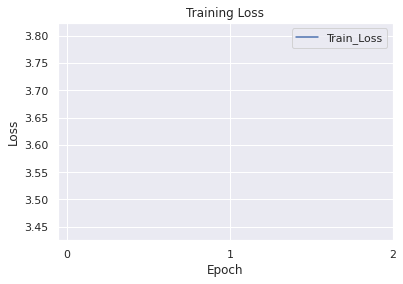

Training Epoch's:  33%|███▎      | 1/3 [09:30<19:01, 570.56s/it]

KeyboardInterrupt: ignored

In [24]:
print("Models Available:\n 1: BERT \n 2: RoBERTa \n 3: ELECTRA \n 4: ALBERT \n 5: DeBERTa \n 6: All\n")
choice = int(input("Select the model you'd like to run:"))

learningRate = float(input("Please enter a learning rate:"))
batchSize = int(input("Please enter batch size:"))
numEpochs = int(input("Please enter the number of epochs:"))
maxSeqLength = int(input("Please enter the maximum sequence length:"))
gradSteps = int(input("Please enter the number of gradient steps:"))

if choice == 1:
  print("\nYou have selected the BERT model")
  optimizer = AdamW(modelB.parameters(), lr=learningRate, eps=1e-8)
  runModel(modelB, tokenizerB, optimizer, batchSize, maxSeqLength, gradSteps, numEpochs)

elif choice == 2:
  print("\nYou have selected the RoBERTa model")
  optimizer = AdamW(modelR.parameters(), lr=learningRate, eps=1e-8)
  runModel(modelR, tokenizerR, optimizer, batchSize, maxSeqLength, gradSteps, numEpochs)

elif choice == 3:
  print("\nYou have selected the ELECTRA model")
  optimizer = AdamW(modelE.parameters(), lr=learningRate, eps=1e-8)
  runModel(modelE, tokenizerE, optimizer, batchSize, maxSeqLength, gradSteps, numEpochs)

elif choice == 4:
  print("\nYou have selected the ALBERT model")
  optimizer = AdamW(modelA.parameters(), lr=learningRate, eps=1e-8)
  runModel(modelA, tokenizerA, optimizer, batchSize, maxSeqLength, gradSteps, numEpochs)

elif choice == 5:
  print("\nYou have selected the DeBERTa model")
  optimizer = AdamW(modelD.parameters(), lr=learningRate, eps=1e-8)
  runModel(modelD, tokenizerD, optimizer, batchSize, maxSeqLength, gradSteps, numEpochs)

elif choice == 6:
  print("\nYou have selected to run all models")

  print("\nNow running BERT")
  optimizer = AdamW(modelB.parameters(), lr=learningRate, eps=1e-8)
  runModel(modelB, tokenizerB, optimizer, batchSize, maxSeqLength, gradSteps, numEpochs)

  print("\nNow running RoBERTa")
  optimizer = AdamW(modelR.parameters(), lr=learningRate, eps=1e-8)
  runModel(modelR, tokenizerR, optimizer, batchSize, maxSeqLength, gradSteps, numEpochs)

  print("\nNow running ELECTRA")
  optimizer = AdamW(modelE.parameters(), lr=learningRate, eps=1e-8)
  runModel(modelE, tokenizerE, optimizer, batchSize, maxSeqLength, gradSteps, numEpochs)

  print("\nNow running ALBERT")
  optimizer = AdamW(modelA.parameters(), lr=learningRate, eps=1e-8)
  runModel(modelA, tokenizerA, optimizer, batchSize, maxSeqLength, gradSteps, numEpochs)

  print("\nNow running DeBERTa")
  optimizer = AdamW(modelD.parameters(), lr=learningRate, eps=1e-8)
  runModel(modelD, tokenizerD, optimizer, batchSize, maxSeqLength, gradSteps, numEpochs)


